
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;🐍Python Refresher for Sustainable Energy Management Module
#### &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;🎓Nottingham Trent University
______________________________________________________________________________________________________

## Workshop PVWatts

## Outline
- PVWatts Website
- How to use PVWatts API
_______________________________________________________________________________________________________________________________________________________

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;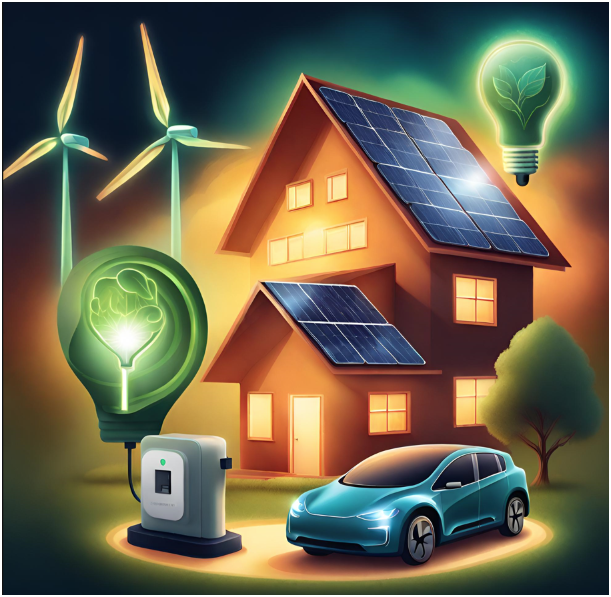

## PVWatts Website

PVWatts Website:

- https://pvwatts.nrel.gov/index.php

Provided by NREL (National Renewable Energy Laboratory) is a calculator Estimates the energy production of grid-connected photovoltaic (PV) energy systems throughout the world. It allows homeowners, small building owners, installers and manufacturers to easily develop estimates of the performance of potential PV installations.

-You can Enter your Zipcode or Address for instance NG11 8NS for clifton campus


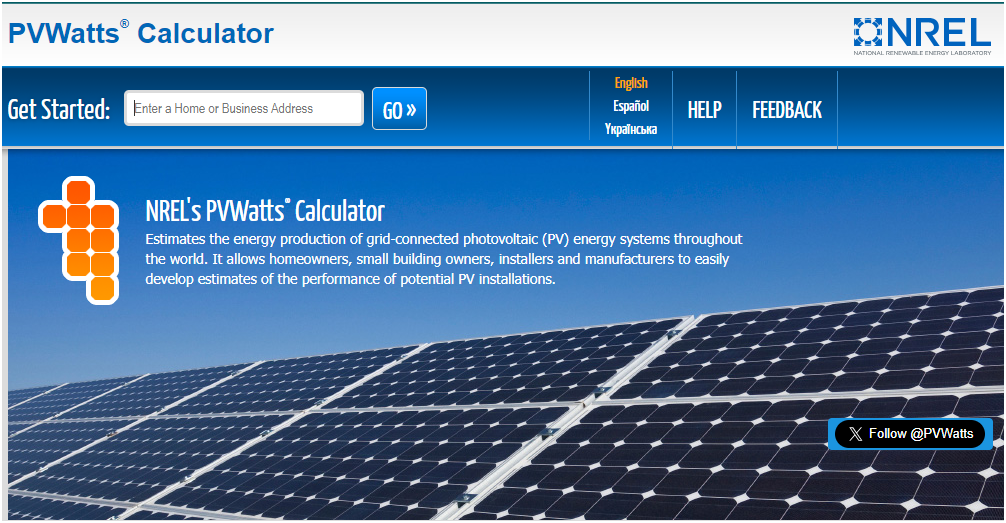

- Then website choose the best solar resource data

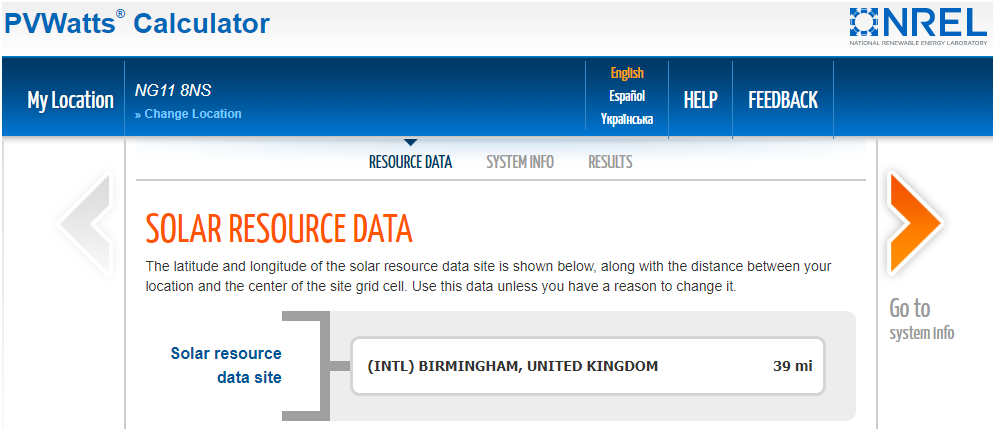

- Then you can add your PV System data in next page

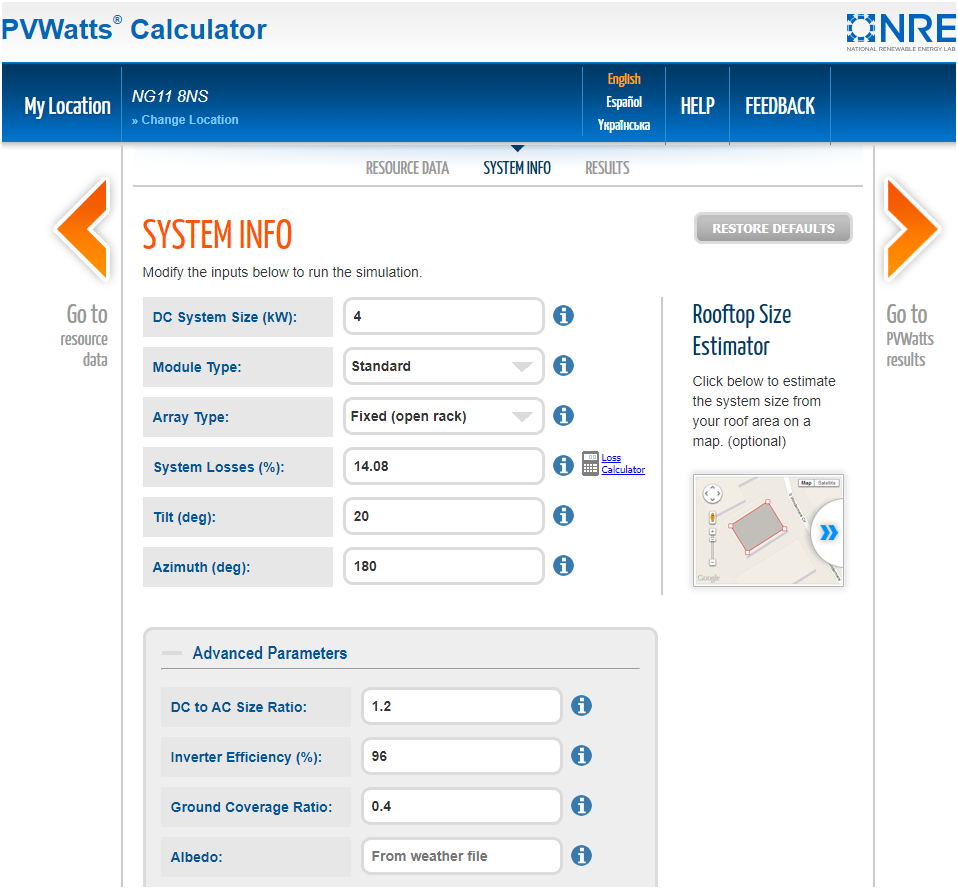

- By Clicking on **i** icon you can get more information about each parameter

- Then you can see the PV monthly and annually solar generation and Radiation

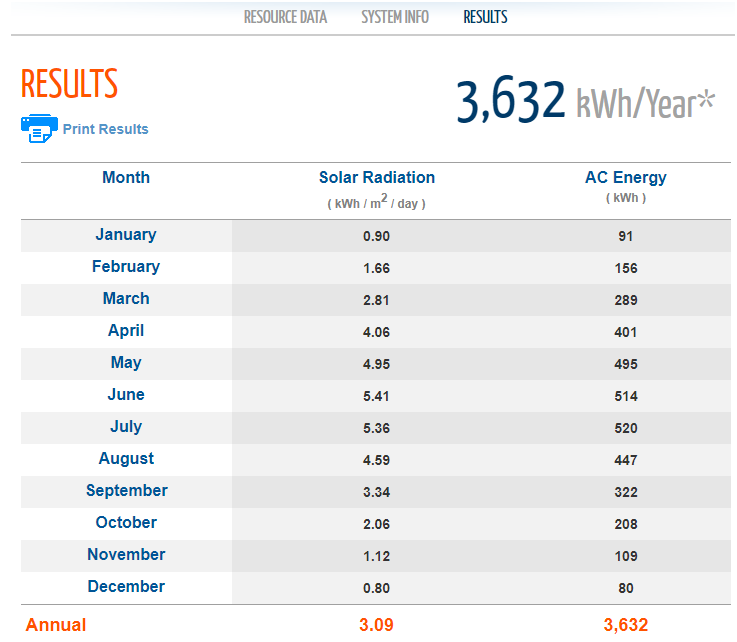

_______________________________________________________________________________________________________________________________________________________
## How to use PVWatts API
### Web API:
A Web API is a set of protocols for building and integrating application software over the web, allowing different systems to communicate with each other via HTTP requests. The Requests library in Python is commonly used to interact with Web APIs by sending HTTP requests to access or manipulate resources.
### NREL API:
Is a specific Web API provided by the National Renewable Energy Laboratory, offering access to a wide range of data, including solar power potential and energy efficiency, through these HTTP requests.

In [ ]:
# import request library for using API
import requests

# Define the PVWatts API URL
url = 'https://developer.nrel.gov/api/pvwatts/v8.json'

# Define your API key
# You can create your own key from https://developer.nrel.gov/signup/
api_key = 'HkZjfGzD5csKvFCY62BdtHYrHg3xFuNUwf3zAAFR'

# Define the parameters for the PVWatts API request
# All of the parameters described at https://developer.nrel.gov/docs/solar/pvwatts/v8/
params = {
    'format': 'json',
    'api_key': api_key,
    "azimuth":0,
    
    "lat": 52.91296,  # latitude Clifton Campus
    "lon": -1.18461,  # longitude Clifton Campus
#    "lat": -25.284266,  # latitude Egypt Dessert
#    "lon": 137.419998,  # longitude Egypt Dessert
#    "lat": -24.570000,  # latitude Deserts of Australia
#    "lon": -1.18461,  # longitude Deserts of Australia
    "system_capacity":4,
    "losses":14,
    "array_type":1,
    "module_type":0,
    "gcr":0.4,
    "dc_ac_ratio":1.2,
    "inv_eff":96.0,
    "radius":0,
    "dataset": "nsrdb",
    "tilt": 10
}

# Send the API request
response = requests.get(url, params=params)

# Check if the request was successful (HTTP status code 200)
if response.status_code == 200:
    data = response.json()
    # Process the response data as per your requirements
    # For example, you can access the estimated energy production
    ac_annual = data['outputs']['ac_annual']
    ac_monthly = data['outputs']['ac_monthly']
    print(f"Estimated annual AC energy production: {ac_annual} kWh")
    print(f"Estimated Monthly AC energy production: {ac_monthly} kWh")
else:
    print(f"Request failed with status code {response.status_code}")


In [ ]:
data

### Plot the results

In [ ]:
import matplotlib.pyplot as plt

# Assuming `ac_monthly` is a list with the monthly AC energy production values you obtained from the API

# Define the months for the x-axis
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(months, ac_monthly, color='skyblue')  # Plot the data with skyblue color bars

# Add title and labels
plt.title('Estimated Monthly AC Energy Production')
plt.xlabel('Month')
plt.ylabel('AC Energy Production (kWh)')

# Show the plot
plt.tight_layout()
plt.show()
